In [1]:
import pandas as pd
import re
import numpy as np

#import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

#%pip install shap
#import shap
#%pip install nbeats-pytorch
df = pd.read_csv("/content/dataFinal.csv")
sales = pd.read_csv("/content/sales.csv")

# Function to handle string lists

This function, named `cleanString`, is designed to process and clean a string containing numerical values. The steps performed by the function are as follows:

1. **Remove Ellipsis and Extra Spaces:**
   - The function uses regular expressions to remove any occurrences of ellipsis ('...') from the input string.
   - It then utilizes the `re.sub` function to replace multiple consecutive spaces with a single space.

2. **Add a Zero After the Decimal Point:**
   - The function appends a zero after the decimal point for single-digit integers in the cleaned string. For example, '2. ' becomes '2.0 '.

3. **Replace the Last '...' with ']':**
   - The function replaces the last occurrence of '...' in the cleaned string with ']'.

4. **Remove Brackets and Split by Space:**
   - The function removes the leading and trailing brackets from the cleaned string.
   - It then splits the string into individual values based on spaces.

5. **Convert to Numpy Array:**
   - The resulting split values are converted into a NumPy array of floating-point numbers using `np.array`.

6. **Return Resulting Array:**
   - The final cleaned and processed array is returned by the function.

To use this function, pass a string containing numerical values to it, and it will return a NumPy array after the specified cleaning operations.

In [2]:
def cleanString(input_str):

    # Remove ellipsis and extra spaces
    cleaned_str = re.sub(r'\.{3}', '', input_str)
    cleaned_str = ' '.join(cleaned_str.split())

    # Add a zero after the decimal point for single-digit integers
    cleaned_str = cleaned_str.replace('. ', '.0 ')

    # Replace the last '...' with ']'
    cleaned_str = cleaned_str.replace('...', ']')

    input_str = ' '.join(cleaned_str.split())

    # Remove brackets and split by space
    split_values = input_str[1:-1].split()

    # Convert to numpy array
    result_array = np.array(split_values, dtype=float)

    return result_array.mean()

# Features Handling

This code snippet appears to perform the following operations on the DataFrame `df`:

1. **Loop over specified columns (`cols`):**
  
   It iterates over the columns specified in the list `cols`.

2. **Process each column's data:**

   It processes the data in each column by splitting the string, removing multiple spaces, and applying the `cleanString` function (not defined in the provided code). The results are stored in `listOfArrays`.

3. **Create a new DataFrame with processed data:**
   
   It creates a new DataFrame (`image_features_df`) from the processed data and assigns column names based on the original column names.

4. **Drop the original column and concatenate the new DataFrame:**

   It drops the original column from the DataFrame and concatenates the new DataFrame (`image_features_df`) along the columns.

5. **Drop a specific column ('Unnamed: 0'):**
   
   It drops the column named 'Unnamed: 0' from the DataFrame.

6. **Replace NaN values with zeros:**
   
   It replaces any NaN (Not a Number) values in the DataFrame with zeros.

Please note that the functionality of this code depends on the implementation of the `cleanString` function, which is not provided in the code snippet. Additionally, the success of the operations depends on the structure and content of the original DataFrame (`df`).

In [3]:
cols = ['image_features', 'cat_gtrend', 'col_gtrend', 'fab_gtrend']

for col in cols:
    image_features_list = df[col].tolist()

    listOfArrays = []
    for str in image_features_list:

        # Replace multiple spaces with a single space
        input_str = ' '.join(str.split())
        result_array = cleanString(input_str)
        listOfArrays.append(result_array)

    #listOfArrays = df['image_features']

    #num_features = len(listOfArrays[1])

    image_features_df = pd.DataFrame(listOfArrays, columns=[col])
    #image_features_df = pd.DataFrame(listOfArrays, columns=[f"%s{i}" %col for i in range(num_features)])

    df = df.drop(col, axis=1)

    df = pd.concat([df, image_features_df], axis=1)

df = df.drop('Unnamed: 0', axis=1)

#replace NaN with zeros
df.fillna(0, inplace=True)

<ipython-input-2-0797632729ec>:21: RuntimeWarning: Mean of empty slice.
  return result_array.mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-2-0797632729ec>:21: RuntimeWarning: Mean of empty slice.
  return result_array.mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-2-0797632729ec>:21: RuntimeWarning: Mean of empty slice.
  return result_array.mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


# Split Data

This code snippet appears to be preparing training and testing datasets by splitting the original DataFrame into features (X) and target variables (y), and then converting them into NumPy arrays. Here's a breakdown of the code:

1. **Define Features and Target Variables:**
  

   It selects specific columns from the DataFrame `df` to create separate DataFrames for training features (`x_train`), training targets (`y_train`), testing features (`x_test`), and testing targets (`y_test`).

2. **Convert DataFrames to NumPy Arrays:**
  

   It converts the selected DataFrames into NumPy arrays. This is a common step before feeding the data into machine learning models, as many machine learning libraries (including scikit-learn and TensorFlow) work with NumPy arrays.

After running this code, you will have four NumPy arrays (`x_train`, `y_train`, `x_test`, and `y_test`) that can be used for training and testing machine learning models. Make sure that the dimensions of these arrays are appropriate for the specific machine learning algorithm you plan to use.

In [4]:
#split data
x_train = df[['category_encoded', 'fabric_encoded',
       'color_encoded', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       'image_features', 'cat_gtrend', 'col_gtrend', 'fab_gtrend']]

y_train = df[['10']]

x_test = df[['category_encoded', 'fabric_encoded',
       'color_encoded', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       'image_features', 'cat_gtrend', 'col_gtrend', 'fab_gtrend']]

y_test = df[['11']]

#convert to numpy
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

# Standardaization

The provided code standardizes the features of a machine learning dataset using the `StandardScaler` from scikit-learn. It involves the following steps:



1. **Define Features and Target Variables:**
   - Select specific columns from the dataset for training and testing features (`x_train` and `x_test`) and targets (`y_train` and `y_test`).

2. **Convert DataFrames to NumPy Arrays:**
   - Convert the selected DataFrames into NumPy arrays, which is a common step before feeding data into machine learning models.

3. **Standardize Features:**
   - Create an instance of the `StandardScaler`.
   - Fit the scaler to the training data to compute mean and standard deviation.
   - Transform both the training and testing data using the computed statistics for standardization.

After this preprocessing, the features are standardized, meaning they have a mean of 0 and a standard deviation of 1, making them suitable for certain machine learning algorithms that benefit from standardized input features.

In [5]:
# Standardize Features

# Use StandardScaler to scale the training and validation data
scaler = StandardScaler()
#Fit the StandardScaler to the training data
scaler.fit(x_train)
# transform both the training and validation data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#!pip install nbeats-pytorch

In [6]:
import warnings

from nbeats_pytorch.model import NBeatsNet as NBeatsPytorch


In [7]:
def createModel():
  model_pytorch = NBeatsPytorch(backcast_length=17, forecast_length=1,
                              stack_types=(NBeatsPytorch.GENERIC_BLOCK, NBeatsPytorch.GENERIC_BLOCK, NBeatsPytorch.SEASONALITY_BLOCK, NBeatsPytorch.TREND_BLOCK,),
                              nb_blocks_per_stack=2, thetas_dim=(4,4,4,4),
                              share_weights_in_stack=True, hidden_layer_units=64)
  return model_pytorch

In [ ]:
'''
def createModel ():
    model_pytorch = NBeatsPytorch( backcast_length=17, forecast_length=1,
                                      stack_types=(NBeatsPytorch.GENERIC_BLOCK, NBeatsPytorch.GENERIC_BLOCK),
                                      nb_blocks_per_stack=2, thetas_dim=(4, 4), share_weights_in_stack=True,
                                      hidden_layer_units=64)
    return model_pytorch
'''

In [8]:
model_pytorch = createModel()
model_pytorch.compile(loss='mse', optimizer='adam')

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=True)
     | -- GenericBlock(units=64, thetas_dim=4, backcast_length=17, forecast_length=1, share_thetas=False) at @134093519405648
     | -- GenericBlock(units=64, thetas_dim=4, backcast_length=17, forecast_length=1, share_thetas=False) at @134093519405648
| --  Stack Generic (#1) (share_weights_in_stack=True)
     | -- GenericBlock(units=64, thetas_dim=4, backcast_length=17, forecast_length=1, share_thetas=False) at @134093519406080
     | -- GenericBlock(units=64, thetas_dim=4, backcast_length=17, forecast_length=1, share_thetas=False) at @134093519406080
| --  Stack Seasonality (#2) (share_weights_in_stack=True)
     | -- SeasonalityBlock(units=64, thetas_dim=1, backcast_length=17, forecast_length=1, share_thetas=True) at @134093519405888
     | -- SeasonalityBlock(units=64, thetas_dim=1, backcast_length=17, forecast_length=1, share_thetas=True) at @134093519405888
| --  Stack Trend (#3) (share_weights_in_stack=True)
     |

In [9]:
print('Pytorch training...')
model_pytorch.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Pytorch training...
Epoch 1/5
835/835 [==============================] - 11s 13ms/step - loss: 1.8479 - val_loss: 1.4379
Epoch 2/5
835/835 [==============================] - 10s 12ms/step - loss: 1.6412 - val_loss: 1.4126
Epoch 3/5
835/835 [==============================] - 10s 13ms/step - loss: 1.6174 - val_loss: 1.4257
Epoch 4/5
835/835 [==============================] - 10s 12ms/step - loss: 1.6145 - val_loss: 1.4659
Epoch 5/5
835/835 [==============================] - 11s 13ms/step - loss: 1.6043 - val_loss: 1.4082


In [10]:
y_test_pred = model_pytorch.predict(x_test)

model_wape = (mae(y_test,y_test_pred)*int(len(y_test_pred)) ) / sum(y_test)[0]
print("Model wape : ", model_wape)

model_mae = mae(y_test, y_test_pred)
print("Model Validation mae : ", model_mae)

Model wape :  1.1533917958171283
Model Validation mae :  0.7482959856774447


## **Plot Predictions**

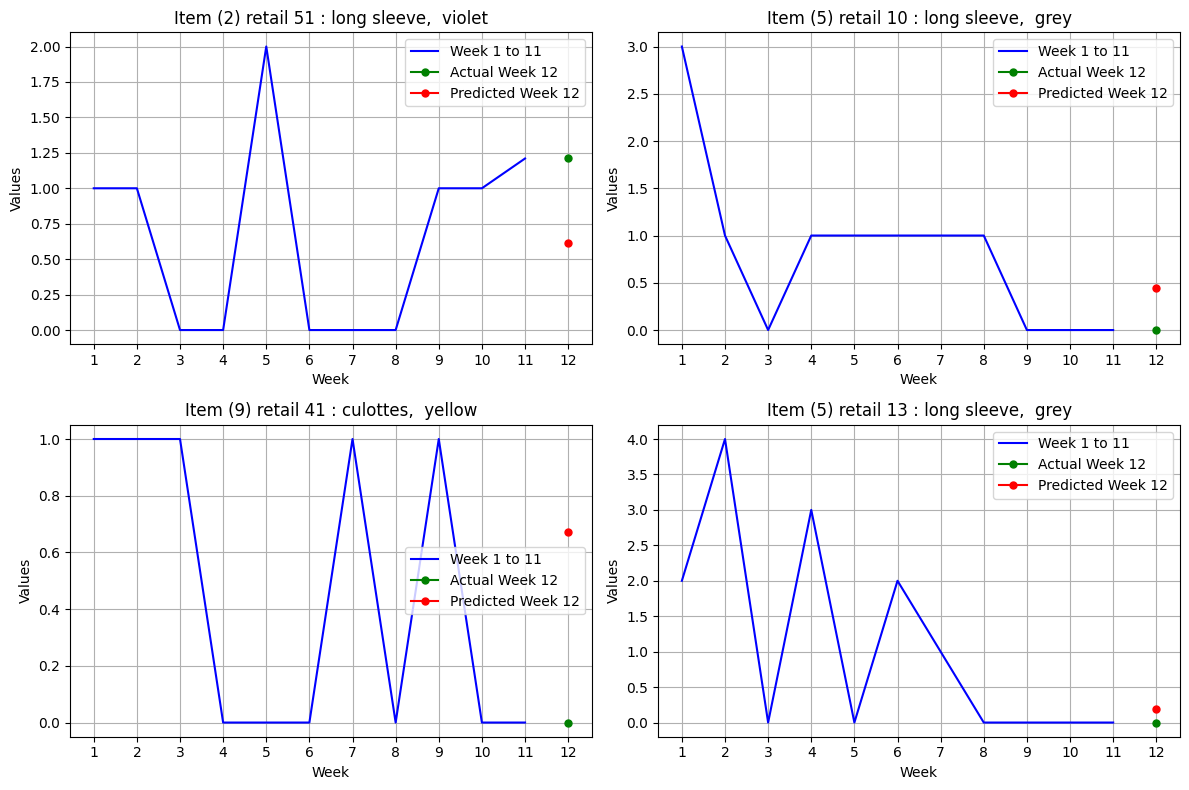

In [11]:
# inverse transformation
x_test_original = scaler.inverse_transform(x_train)
x_test_original = scaler.inverse_transform(x_test)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in enumerate(axs.flat, start=1):
    # Plot original data from week 1 to 11 in blue
    ax.plot(range(1, 12), x_test_original[i, 3:14], color='blue', label='Week 1 to 11')

    # Plot actual data for week 12 in green
    ax.plot(12, x_test_original[i, 13], marker='o', markersize=5, color='green', label='Actual Week 12')

    # Plot predicted data for week 12 in red
    ax.plot(12, y_test_pred[i], marker='o', markersize=5, color='red', label='Predicted Week 12')

    ax.set_xticks(range(1, 13))  # Set the x-axis ticks from 1 to 12
    ax.set_xlabel('Week')
    ax.set_ylabel('Values')
    ax.set_title(f'Item ({sales.external_code[i]}) retail {sales.retail[i]} : {sales.category[i]},  {sales.color[i]}')
    ax.legend()
    # Add a grid to the subplot
    ax.grid(True)

plt.tight_layout()
plt.show()

# Cross Validation

In [12]:
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import (
    KFold,
    StratifiedKFold,
    LeaveOneOut,
    RepeatedKFold,
    TimeSeriesSplit,
    cross_val_score,
)

# TimeSeriesSplit

In [13]:

# Specify the number of folds for cross-validation
n_splits = 2

tscv = TimeSeriesSplit(n_splits=5)  # Adjust n_splits as needed

# Create and compile your Keras model
model = createModel()
model.compile(loss='mse', optimizer='adam')
# Initialize a list to store cross-validation scores
cv_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(x_train):
    X_train, X_test = x_train[train_index], x_test[test_index]
    Y_train, Y_test = y_train[train_index], y_test[test_index]


    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

    # Train the model on the training data
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

    # Evaluate the model on the test data
    y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    cv_scores.append(mse)

# Calculate the mean cross-validation score
mean_cv_score = np.mean(cv_scores)
print(f'Mean Cross-Validation MSE: {mean_cv_score}')

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=True)
     | -- GenericBlock(units=64, thetas_dim=4, backcast_length=17, forecast_length=1, share_thetas=False) at @134093519406944
     | -- GenericBlock(units=64, thetas_dim=4, backcast_length=17, forecast_length=1, share_thetas=False) at @134093519406944
| --  Stack Generic (#1) (share_weights_in_stack=True)
     | -- GenericBlock(units=64, thetas_dim=4, backcast_length=17, forecast_length=1, share_thetas=False) at @134092979018896
     | -- GenericBlock(units=64, thetas_dim=4, backcast_length=17, forecast_length=1, share_thetas=False) at @134092979018896
| --  Stack Seasonality (#2) (share_weights_in_stack=True)
     | -- SeasonalityBlock(units=64, thetas_dim=1, backcast_length=17, forecast_length=1, share_thetas=True) at @134092979019520
     | -- SeasonalityBlock(units=64, thetas_dim=1, backcast_length=17, forecast_length=1, share_thetas=True) at @134092979019520
| --  Stack Trend (#3) (share_weights_in_stack=True)
     |

# group_time_series_cv

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GroupKFold
from sklearn.metrics import mean_squared_error

def group_time_series_cv(model, X, y, groups, n_splits=2):

    gkf = GroupKFold(n_splits=n_splits)
    mse_scores = []

    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    groups = pd.DataFrame(groups)

    for train_index, test_index in gkf.split(X, y, groups=groups):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        X_train = X_train.values
        X_test = X_test.values
        y_train = y_train.values
        y_test = y_test.values


        # Train the model on the training data
        model.fit(X_train, y_train, validation_data=(X_test, y_test),  epochs=3, batch_size=128)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate performance (you can replace this with your preferred metric)
        mse = mean_squared_error(y_test, y_pred)

        mse_scores.append(mse)

        # Optionally, you may update the model parameters here based on performance
    mse_scores = np.array(mse_scores)
    return mse_scores

model = createModel()
model.compile(loss='mse', optimizer='adam')

groups = x_train[:,14] #choose Last week
mse_scores = group_time_series_cv(model, x_train, y_train, groups, n_splits=2)
print("Mean Squared Error:", mse_scores.mean())


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GroupKFold

def purged_group_time_series_cv_iterative(X, y, groups, n_splits, group_gap ):

    model = createModel()
    model.compile(loss='mse', optimizer='adam')

    mse_scores = []


    df = pd.DataFrame({'y': y.ravel(), 'groups': groups.ravel()})
    df = pd.concat([df, pd.DataFrame(X, columns=[f'feature{i+1}' for i in range(X.shape[1])])], axis=1)

    # Find the unique groups
    unique_groups = df['groups'].unique()

    # Loop over folds
    for i in range(n_splits):
        # Split the groups into training and validation sets
        train_groups = unique_groups[:i + 1]
        val_groups = unique_groups[i + 1:i + 2]

        # Filter the data based on the selected groups
        train_data = df[df['groups'].isin(train_groups)]
        val_data = df[df['groups'].isin(val_groups)]

        # Purge overlapping data points within the training set
        train_data_purged = train_data.iloc[:-group_gap]

        # Extract features and target variables
        X_train = train_data_purged.iloc[:, 2:19]
        y_train = train_data_purged['y']

        X_val = val_data.iloc[:, 2:19]
        y_val = val_data['y']

        X_train = X_train.values
        X_val = X_val.values
        y_train = y_train.values
        y_val = y_val.values

        # Train the model
        model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=5)

        # Make predictions on the validation set
        y_pred = model.predict(X_val)

        # Evaluate performance (you can replace this with your preferred metric)
        mse = mean_squared_error(y_val, y_pred)
        mse_scores.append(mse)

    mse_scores = np.array(mse_scores)

    return mse_scores


groups = x_train[:,14] #choose Last week

# Set the number of splits for cross-validation
n_splits = 2

# Set the group gap
group_gap = 2

# Perform Iterative Purged Group Time Series Cross-Validation
mse_scores = purged_group_time_series_cv_iterative(x_train, y_train, groups, n_splits=n_splits, group_gap=group_gap)

print("Mean Squared Error", mse_scores.mean())


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error

def comb_purged_group_kfold_cv(X, y, groups, n_splits=2, embargo=2, group_gap=2):

    # Initialize the model
    model = createModel()
    model.compile(loss='mse', optimizer='adam')

    mse_scores = []

    # Create a DataFrame to simplify indexing
    df = pd.DataFrame({'y': y.ravel(), 'groups': groups.ravel()})
    df = pd.concat([df, pd.DataFrame(X, columns=[f'feature{i+1}' for i in range(X.shape[1])])], axis=1)

    # Find the unique groups
    unique_groups = df['groups'].unique()

    # Initialize Group K-Fold
    gkf = GroupKFold(n_splits=n_splits)

    # Loop over folds
    for train_index, test_index in gkf.split(X, y, groups=groups):
        # Extract training and validation sets
        X_train, X_val = X[train_index], X[test_index]
        y_train, y_val = y[train_index], y[test_index]

        # Extract unique groups in the training set
        train_groups = np.unique(groups[train_index])

        # Initialize Combinatorial Purged Group K-Fold
        comb_purged_gkf = GroupKFold(n_splits=2)

        # Loop over combinatorial purged folds
        for _, comb_purged_val_index in comb_purged_gkf.split(X_val, groups=groups[test_index]):
            comb_purged_val_index = comb_purged_val_index[0]

            # Purge overlapping data points within the training set
            purge_mask = (groups[train_index] != groups[test_index][comb_purged_val_index])
            X_train_purged = X_train[purge_mask]
            y_train_purged = y_train[purge_mask]

            # Extract embargoed data points in the validation set
            embargo_mask = (groups[test_index] != groups[test_index][comb_purged_val_index]) & (
                    groups[test_index] != groups[test_index][comb_purged_val_index - embargo])
            X_val_embargoed = X_val[embargo_mask]
            y_val_embargoed = y_val[embargo_mask]
            '''
            X_train_purged = X_train_purged.values
            X_val_embargoed = X_val_embargoed.values
            y_train_purged = y_train_purged.values
            y_val_embargoed = y_val_embargoed.values
            '''
            # Train the model
            model.fit(X_train_purged, y_train_purged, validation_data=(X_val_embargoed, y_val_embargoed),epochs=5)

            # Make predictions on the embargoed validation set
            y_pred_embargoed = model.predict(X_val_embargoed)

            # Evaluate performance on the embargoed validation set
            mse = mean_squared_error(y_val_embargoed, y_pred_embargoed)
            mse_scores.append(mse)

    mse_scores = np.array(mse_scores)
    return mse_scores

groups = x_train[:,14] #choose Last week

# Set the number of splits for cross-validation
n_splits = 2

# Set the embargo and group gap
embargo = 2
group_gap = 2

# Perform Combinatorial Purged Group K-Fold Cross-Validation
mse_scores = comb_purged_group_kfold_cv(x_train, y_train, groups, n_splits=n_splits, embargo=embargo, group_gap=group_gap)

print("Mean Squared Error", mse_scores.mean())
